data_preprocessing.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


experiment_general_synthetic_data.py


=== Running experiment for dimension 1 ===


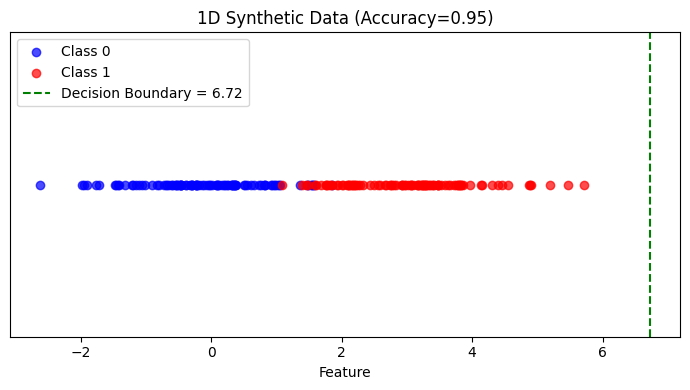


=== Running experiment for dimension 2 ===


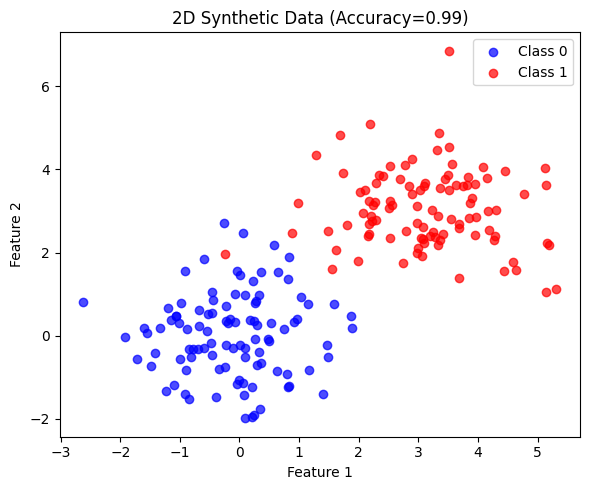


=== Running experiment for dimension 3 ===


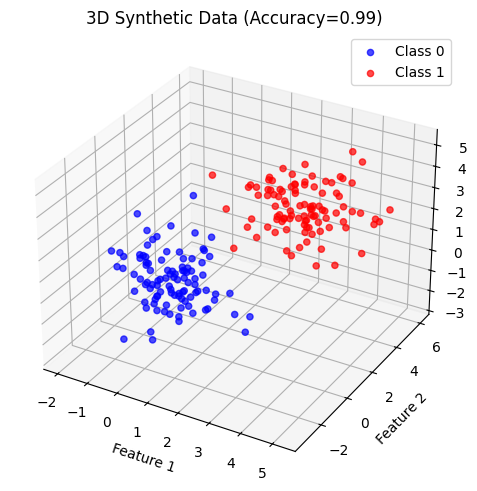


=== Running experiment for dimension 4 ===


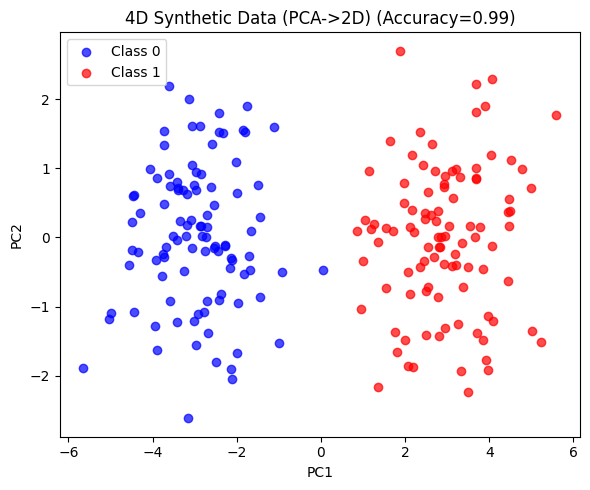


=== Running experiment for dimension 5 ===


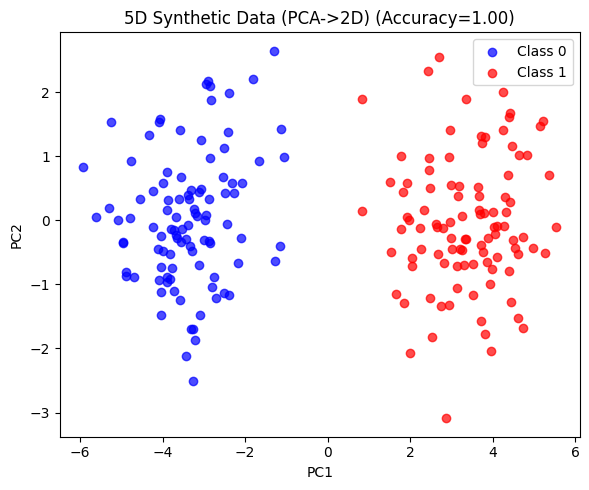

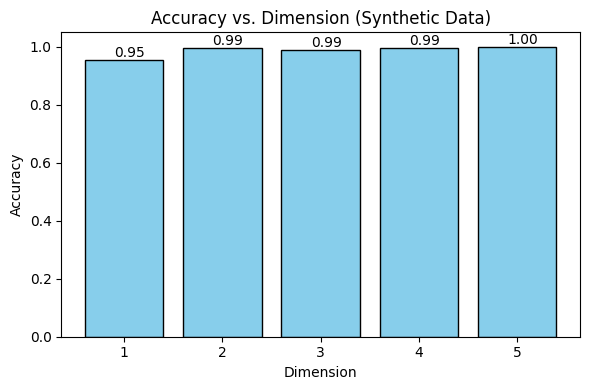

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

def bayes_classifier(X, means, covariances, priors):
    """
    Classify feature vectors X using the Bayes decision rule.

    Parameters:
        X: numpy array of shape (n_samples, d)
        means: list of mean vectors for each class
        covariances: list of covariance matrices for each class
        priors: list of prior probabilities for each class

    Returns:
        predictions: numpy array of predicted class labels (0 or 1)
    """
    n_samples = X.shape[0]
    n_classes = len(means)
    posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihood = rv.pdf(X)
        posterior[:, i] = likelihood * priors[i]

    predictions = np.argmax(posterior, axis=1)
    return predictions

def run_experiment(dimension, n_samples_per_class=100, plot=True):
    """
    Generate synthetic Gaussian data for two classes in 'dimension' dimensions,
    classify with Bayes decision rule, compute accuracy, and optionally plot.

    Returns:
        accuracy: classification accuracy (float)
    """
    np.random.seed(42)
    # Define parameters for the two classes
    # Class 0: mean = [0, 0, ..., 0]
    # Class 1: mean = [3, 3, ..., 3]
    mean0 = [0] * dimension
    mean1 = [3] * dimension
    cov0 = np.eye(dimension)
    cov1 = np.eye(dimension)
    priors = [0.5, 0.5]

    # Generate synthetic data
    X0 = np.random.multivariate_normal(mean0, cov0, n_samples_per_class)
    X1 = np.random.multivariate_normal(mean1, cov1, n_samples_per_class)
    X = np.vstack((X0, X1))
    y_true = np.array([0]*n_samples_per_class + [1]*n_samples_per_class)

    # Classify
    y_pred = bayes_classifier(X, [mean0, mean1], [cov0, cov1], priors)
    accuracy = accuracy_score(y_true, y_pred)

    # Visualization
    if plot:
        if dimension == 1:
            # 1D scatter and decision boundary
            plt.figure(figsize=(7, 4))
            plt.scatter(X0[:, 0], np.zeros_like(X0[:, 0]),
                        color='blue', label='Class 0', alpha=0.7)
            plt.scatter(X1[:, 0], np.zeros_like(X1[:, 0]),
                        color='red', label='Class 1', alpha=0.7)

            # Decision boundary
            x_grid = np.linspace(np.min(X)-1, np.max(X)+1, 500).reshape(-1, 1)
            posterior_grid = np.zeros((len(x_grid), 2))
            rv0 = multivariate_normal(mean=mean0, cov=[[1]])
            rv1 = multivariate_normal(mean=mean1, cov=[[1]])
            posterior_grid[:, 0] = rv0.pdf(x_grid.flatten()) * priors[0]
            posterior_grid[:, 1] = rv1.pdf(x_grid.flatten()) * priors[1]
            diff = posterior_grid[:, 0] - posterior_grid[:, 1]
            boundary_index = np.argmin(np.abs(diff))
            decision_boundary = x_grid[boundary_index, 0]

            plt.axvline(decision_boundary, color='green', linestyle='--',
                        label=f'Decision Boundary = {decision_boundary:.2f}')
            plt.title(f'1D Synthetic Data (Accuracy={accuracy:.2f})')
            plt.xlabel('Feature')
            plt.yticks([])
            plt.legend()
            plt.tight_layout()
            plt.show()

        elif dimension == 2:
            # 2D scatter
            plt.figure(figsize=(6, 5))
            plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0', alpha=0.7)
            plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1', alpha=0.7)
            plt.title(f'2D Synthetic Data (Accuracy={accuracy:.2f})')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.tight_layout()
            plt.show()

        elif dimension == 3:
            # 3D scatter
            from mpl_toolkits.mplot3d import Axes3D
            fig = plt.figure(figsize=(7, 5))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2],
                       color='blue', label='Class 0', alpha=0.7)
            ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2],
                       color='red', label='Class 1', alpha=0.7)
            ax.set_title(f'3D Synthetic Data (Accuracy={accuracy:.2f})')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_zlabel('Feature 3')
            ax.legend()
            plt.tight_layout()
            plt.show()

        else:
            # For 4D and 5D, reduce to 2D via PCA for visualization
            pca = PCA(n_components=2)
            X_reduced = pca.fit_transform(X)
            X0_red = X_reduced[:n_samples_per_class]
            X1_red = X_reduced[n_samples_per_class:]

            plt.figure(figsize=(6, 5))
            plt.scatter(X0_red[:, 0], X0_red[:, 1],
                        color='blue', label='Class 0', alpha=0.7)
            plt.scatter(X1_red[:, 0], X1_red[:, 1],
                        color='red', label='Class 1', alpha=0.7)
            plt.title(f'{dimension}D Synthetic Data (PCA->2D) (Accuracy={accuracy:.2f})')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.legend()
            plt.tight_layout()
            plt.show()

    return accuracy

# -------------------------------------------------------------------------
# Run experiments for dimensions 1 through 5, collect accuracies
# -------------------------------------------------------------------------
dimensions = [1, 2, 3, 4, 5]
accuracies = []

for d in dimensions:
    print(f"\n=== Running experiment for dimension {d} ===")
    acc = run_experiment(dimension=d, n_samples_per_class=100, plot=True)
    accuracies.append(acc)

# -------------------------------------------------------------------------
# Plot accuracy vs dimension
# -------------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.bar([str(d) for d in dimensions], accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Dimension (Synthetic Data)')
plt.ylim(0, 1.05)
for i, v in enumerate(accuracies):
    plt.text(i - 0.1, v + 0.01, f"{v:.2f}", color='black')
plt.tight_layout()
plt.show()


Real-World Experiment (Breast Cancer Dataset):
Classification accuracy: 0.9736379613356766


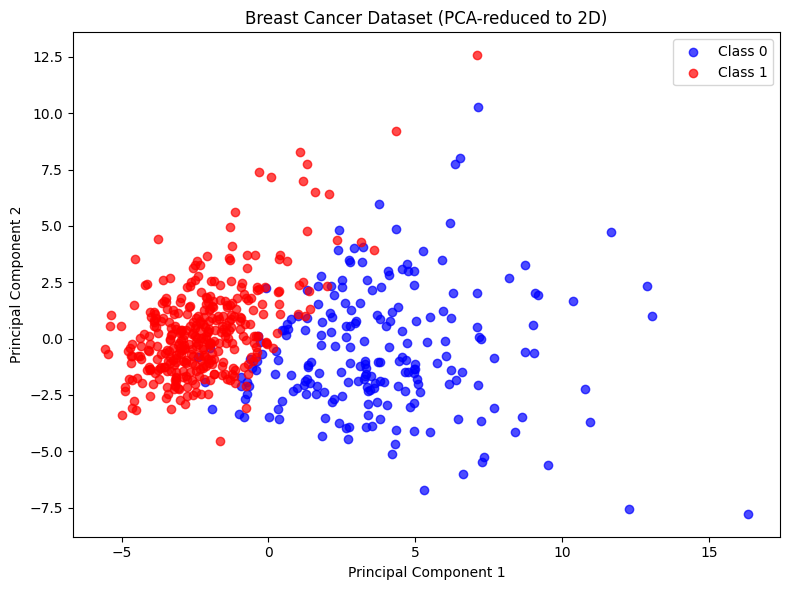

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset from scikit-learn
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# For simplicity, let's assume a Gaussian model per class.
# We compute the empirical means and covariance matrices for each class.
X_class0 = X_scaled[y == 0]
X_class1 = X_scaled[y == 1]

mean0 = np.mean(X_class0, axis=0)
mean1 = np.mean(X_class1, axis=0)
cov0 = np.cov(X_class0, rowvar=False)
cov1 = np.cov(X_class1, rowvar=False)
priors = [len(X_class0)/len(X_scaled), len(X_class1)/len(X_scaled)]

# Classify the data using our Bayes classifier
y_pred = bayes_classifier(X_scaled, [mean0, mean1], [cov0, cov1], priors)
accuracy = accuracy_score(y, y_pred)
print("Real-World Experiment (Breast Cancer Dataset):")
print("Classification accuracy:", accuracy)

# Optional: Visualize using PCA reduction to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], color='red', label='Class 1', alpha=0.7)
plt.title('Breast Cancer Dataset (PCA-reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()


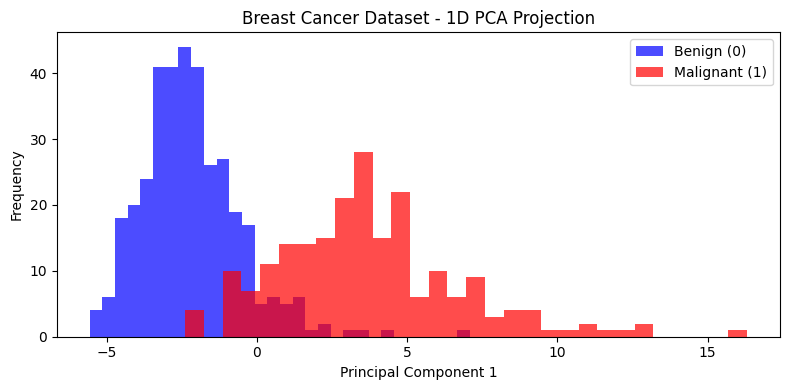

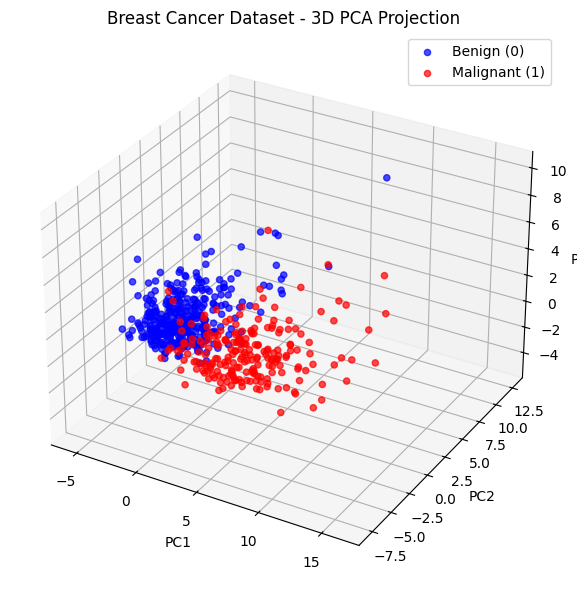

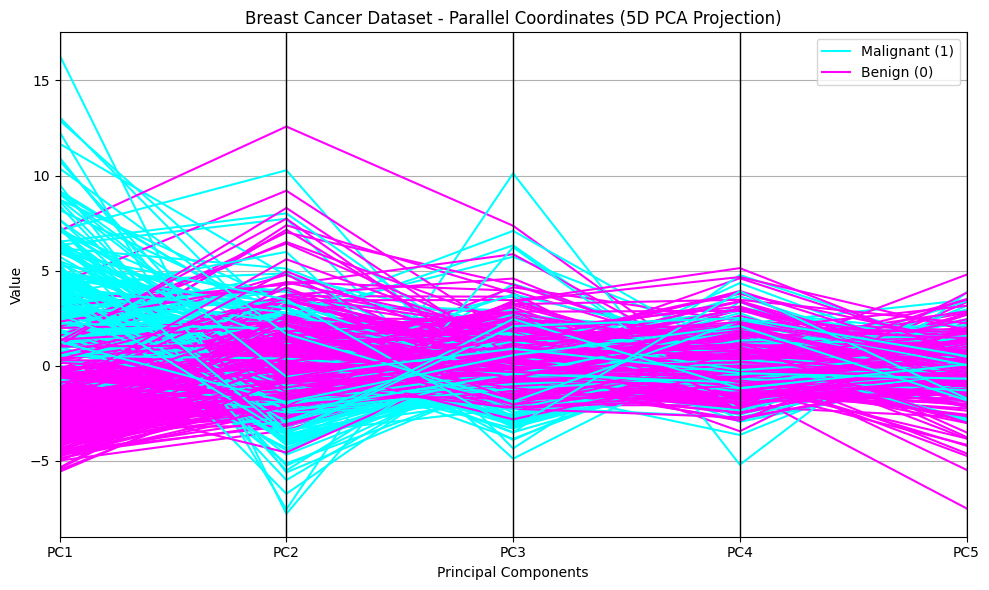

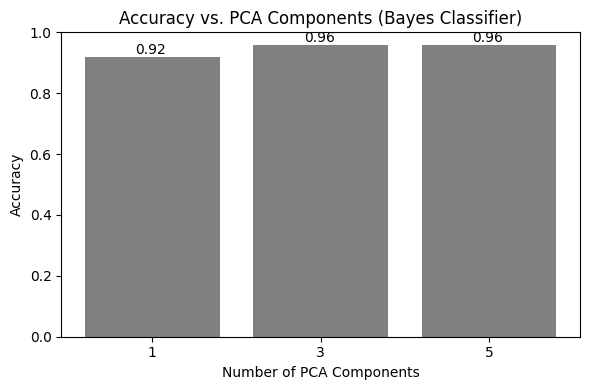

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

# ----------------------------------------------------------------
# 1) Visualize 1D PCA
# ----------------------------------------------------------------
pca1 = PCA(n_components=1)
X_1d = pca1.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.hist(X_1d[y == 0], bins=30, alpha=0.7, label='Benign (0)', color='blue')
plt.hist(X_1d[y == 1], bins=30, alpha=0.7, label='Malignant (1)', color='red')
plt.title('Breast Cancer Dataset - 1D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# 2) Visualize 3D PCA
# ----------------------------------------------------------------
pca3 = PCA(n_components=3)
X_3d = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2],
           color='blue', label='Benign (0)', alpha=0.7)
ax.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2],
           color='red', label='Malignant (1)', alpha=0.7)
ax.set_title('Breast Cancer Dataset - 3D PCA Projection')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# 3) Visualize 5D PCA with Parallel Coordinates
# ----------------------------------------------------------------
pca5 = PCA(n_components=5)
X_5d = pca5.fit_transform(X_scaled)

df_5d = pd.DataFrame(X_5d, columns=[f'PC{i+1}' for i in range(5)])
df_5d['Class'] = np.where(y == 0, 'Benign (0)', 'Malignant (1)')

plt.figure(figsize=(10, 6))
parallel_coordinates(df_5d, 'Class', colormap='cool')
plt.title('Breast Cancer Dataset - Parallel Coordinates (5D PCA Projection)')
plt.xlabel('Principal Components')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# 4) Compute and Plot Accuracy vs. Dimensionality (Bayes Classifier)
# ----------------------------------------------------------------

def bayes_classifier_accuracy(X_in, y_in, n_components):
    """
    1. Reduce dimension to n_components using PCA.
    2. Split into train/test sets.
    3. Estimate Gaussian parameters for each class from training data.
    4. Classify test data via Bayes decision rule.
    5. Return accuracy on test data.
    """
    # Reduce dimension
    pca = PCA(n_components=n_components)
    X_d = pca.fit_transform(X_in)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_d, y_in, test_size=0.3, random_state=42, stratify=y_in
    )

    # Estimate parameters for each class from training data
    X0_train = X_train[y_train == 0]
    X1_train = X_train[y_train == 1]
    mean0 = np.mean(X0_train, axis=0)
    mean1 = np.mean(X1_train, axis=0)
    cov0 = np.cov(X0_train, rowvar=False)
    cov1 = np.cov(X1_train, rowvar=False)
    priors = [
        len(X0_train) / len(X_train),
        len(X1_train) / len(X_train)
    ]

    # Classify test data
    posterior_0 = multivariate_normal(mean=mean0, cov=cov0).pdf(X_test) * priors[0]
    posterior_1 = multivariate_normal(mean=mean1, cov=cov1).pdf(X_test) * priors[1]

    y_pred = (posterior_1 > posterior_0).astype(int)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc

dimensions = [1, 3, 5]
accuracies = []
for d in dimensions:
    acc = bayes_classifier_accuracy(X_scaled, y, d)
    accuracies.append(acc)

plt.figure(figsize=(6, 4))
plt.bar([str(d) for d in dimensions], accuracies, color='gray')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. PCA Components (Bayes Classifier)')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i - 0.1, v + 0.01, f"{v:.2f}", color='black')
plt.tight_layout()
plt.show()


explainable_generative_model_synthetic.py

Sample size per class = 5: Mean error = 0.88, Cov error = 0.81, Accuracy = 0.97
Sample size per class = 10: Mean error = 0.32, Cov error = 0.59, Accuracy = 0.98
Sample size per class = 20: Mean error = 0.26, Cov error = 0.29, Accuracy = 0.98
Sample size per class = 50: Mean error = 0.16, Cov error = 0.28, Accuracy = 0.98
Sample size per class = 100: Mean error = 0.13, Cov error = 0.23, Accuracy = 0.98


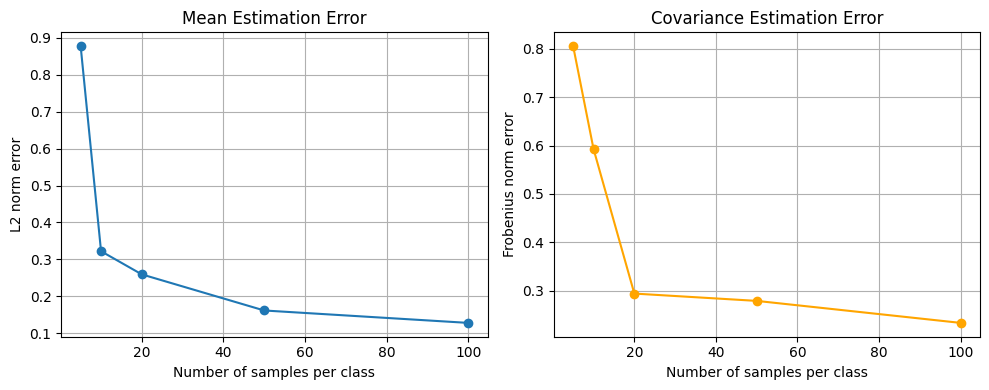

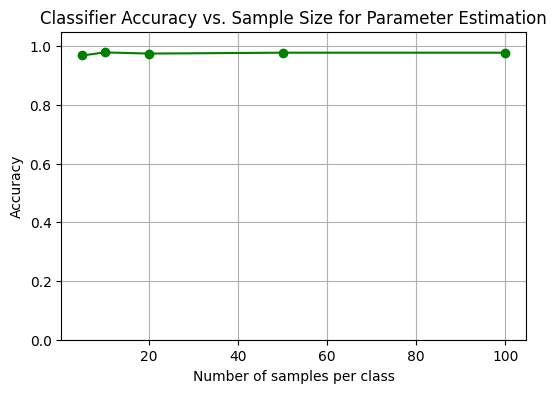

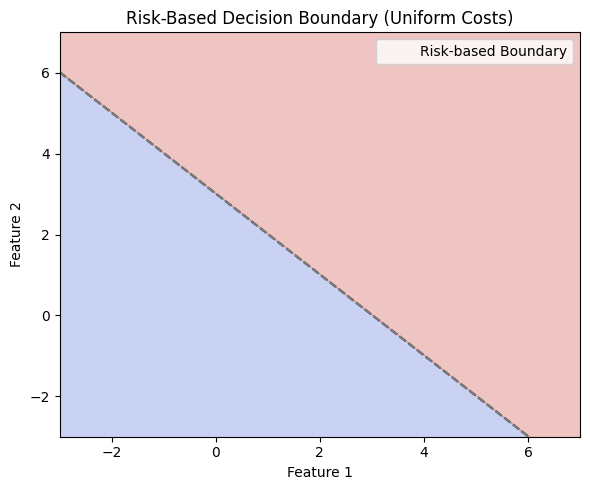

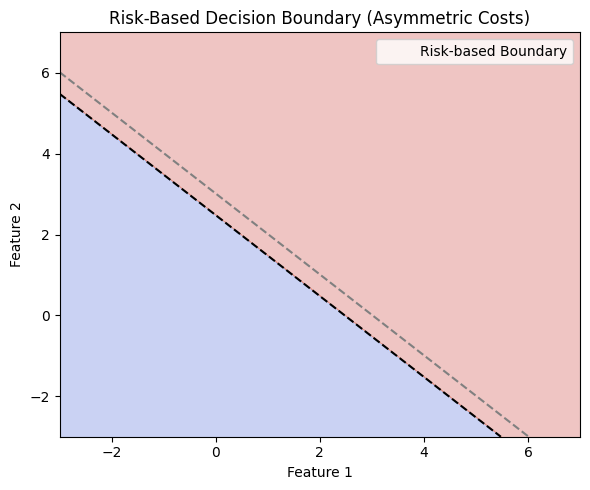

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# -------------------------------
# 1. Parameter Estimation via MLE
# -------------------------------
def bayes_classifier(X, means, covariances, priors):
    """
    Classify feature vectors X using the Bayes decision rule.
    """
    n_samples = X.shape[0]
    n_classes = len(means)
    posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihood = rv.pdf(X)
        posterior[:, i] = likelihood * priors[i]

    predictions = np.argmax(posterior, axis=1)
    return predictions

def generate_synthetic_data(dimension, n_samples_per_class, seed=42):
    """
    Generate synthetic data for two Gaussian classes.
    Class 0: mean = [0,...,0], Class 1: mean = [3,...,3], covariances = identity.
    """
    np.random.seed(seed)
    mean0 = np.zeros(dimension)
    mean1 = np.ones(dimension) * 3
    cov = np.eye(dimension)
    X0 = np.random.multivariate_normal(mean0, cov, n_samples_per_class)
    X1 = np.random.multivariate_normal(mean1, cov, n_samples_per_class)
    X = np.vstack((X0, X1))
    y = np.array([0]*n_samples_per_class + [1]*n_samples_per_class)
    return X, y, mean0, mean1, cov, cov  # true parameters for both classes

def parameter_estimation_experiment(dimension=2, sample_sizes=[5, 10, 20, 50, 100]):
    """
    For each sample size, estimate the parameters for each class and compute:
      (a) The estimation error (difference between estimated and true parameters)
      (b) The classification accuracy on a test set.
    """
    true_mean0, true_mean1, true_cov0, true_cov1 = np.zeros(dimension), np.ones(dimension)*3, np.eye(dimension), np.eye(dimension)

    mean_errors = []
    cov_errors = []
    accuracies = []

    # Generate a large test set using true parameters
    X_test, y_test, _, _, _, _ = generate_synthetic_data(dimension, 1000, seed=101)

    for n in sample_sizes:
        # Generate training data with n samples per class
        X_train, y_train, _, _, _, _ = generate_synthetic_data(dimension, n, seed=42)

        # Split the training data by class
        X_train0 = X_train[y_train == 0]
        X_train1 = X_train[y_train == 1]

        # MLE estimates: sample mean and (biased) covariance estimates.
        est_mean0 = np.mean(X_train0, axis=0)
        est_mean1 = np.mean(X_train1, axis=0)
        # Maximum likelihood covariance (divide by n, not (n-1)):
        est_cov0 = np.cov(X_train0, rowvar=False, bias=True)
        est_cov1 = np.cov(X_train1, rowvar=False, bias=True)

        # Compute errors: using L2 norm for means, Frobenius norm for covariance differences.
        mean_error = (np.linalg.norm(est_mean0 - true_mean0) + np.linalg.norm(est_mean1 - true_mean1)) / 2.0
        cov_error = (np.linalg.norm(est_cov0 - true_cov0, ord='fro') + np.linalg.norm(est_cov1 - true_cov1, ord='fro')) / 2.0

        mean_errors.append(mean_error)
        cov_errors.append(cov_error)

        # Now evaluate classification accuracy using these estimated parameters on X_test.
        priors = [0.5, 0.5]  # true priors are equal
        y_pred = bayes_classifier(X_test, [est_mean0, est_mean1], [est_cov0, est_cov1], priors)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        print(f"Sample size per class = {n}: Mean error = {mean_error:.2f}, Cov error = {cov_error:.2f}, Accuracy = {acc:.2f}")

    # Plot estimation errors vs sample size
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(sample_sizes, mean_errors, marker='o', label='Mean Error')
    plt.xlabel('Number of samples per class')
    plt.ylabel('L2 norm error')
    plt.title('Mean Estimation Error')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(sample_sizes, cov_errors, marker='o', color='orange', label='Covariance Error')
    plt.xlabel('Number of samples per class')
    plt.ylabel('Frobenius norm error')
    plt.title('Covariance Estimation Error')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot classification accuracy vs sample size
    plt.figure(figsize=(6,4))
    plt.plot(sample_sizes, accuracies, marker='o', color='green')
    plt.xlabel('Number of samples per class')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy vs. Sample Size for Parameter Estimation')
    plt.ylim(0,1.05)
    plt.grid(True)
    plt.show()

# Run the parameter estimation experiment for 2D synthetic data.
parameter_estimation_experiment(dimension=2, sample_sizes=[5, 10, 20, 50, 100])

# -----------------------------------------------------
# 2. Decision Risk Analysis with a Cost Matrix
# -----------------------------------------------------
def risk_based_decision(X, means, covariances, priors, cost_matrix):
    """
    For each x in X, compute the posterior probabilities for each class and then
    compute the expected risk for each decision using the provided cost matrix.

    cost_matrix is assumed to be a 2x2 array where:
       cost_matrix[i,j] is the cost of deciding class i when the true class is j.
    Returns the decision (0 or 1) for each x.
    """
    n_samples = X.shape[0]
    n_classes = len(means)
    # Compute likelihoods
    likelihoods = np.zeros((n_samples, n_classes))
    for i in range(n_classes):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihoods[:, i] = rv.pdf(X)

    # Compute unnormalized posteriors (since priors are given)
    unnorm_post = likelihoods * np.array(priors)
    # Normalize to get posterior probabilities
    posteriors = unnorm_post / np.sum(unnorm_post, axis=1, keepdims=True)

    # For each sample, compute expected risk for each decision.
    decisions = np.zeros(n_samples, dtype=int)
    for idx in range(n_samples):
        risk = np.zeros(n_classes)
        # For decision d, expected risk is sum_j cost(d, j) * P(w_j|x)
        for d in range(n_classes):
            risk[d] = np.sum(cost_matrix[d, :] * posteriors[idx, :])
        decisions[idx] = np.argmin(risk)
    return decisions

# Generate a grid for visualization in 2D
def plot_decision_boundaries(means, covariances, priors, cost_matrix, title):
    x_min, x_max = -3, 7
    y_min, y_max = -3, 7
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Standard Bayes classifier without risk adjustment:
    post0 = multivariate_normal(mean=means[0], cov=covariances[0]).pdf(grid) * priors[0]
    post1 = multivariate_normal(mean=means[1], cov=covariances[1]).pdf(grid) * priors[1]
    bayes_decision = (post1 > post0).astype(int)

    # Risk-based decisions:
    risk_decision = risk_based_decision(grid, means, covariances, priors, cost_matrix)

    # Plot the risk-based decision boundary
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, risk_decision.reshape(xx.shape), alpha=0.3, cmap='coolwarm')
    plt.contour(xx, yy, risk_decision.reshape(xx.shape), levels=[0.5], colors='k', linestyles='--')
    plt.scatter(grid[:,0], grid[:,1], c=risk_decision, alpha=0.0)  # invisible points for colorbar scale

    # Also overlay the standard Bayes decision boundary in a dashed line
    plt.contour(xx, yy, bayes_decision.reshape(xx.shape), levels=[0.5], colors='gray', linestyles='dashed')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(['Risk-based Boundary', 'Standard Bayes Boundary'])
    plt.tight_layout()
    plt.show()

# Use full synthetic data (2D) with known true parameters for risk analysis.
dimension = 2
n_samples_per_class = 100
X, y, true_mean0, true_mean1, true_cov0, true_cov1 = generate_synthetic_data(dimension, n_samples_per_class, seed=42)
priors = [0.5, 0.5]
means = [true_mean0, true_mean1]
covariances = [true_cov0, true_cov1]

# Define two risk matrix configurations:
# Configuration 1: Uniform costs (standard Bayes) -> costs for misclassification = 1.
cost_matrix1 = np.array([[0, 1],
                         [1, 0]])
# Configuration 2: Asymmetric costs. For example, cost of deciding class 1 when true is 0 is 5; cost of deciding class 0 when true is 1.
cost_matrix2 = np.array([[0, 5],
                         [1, 0]])

# Plot decision boundaries under each risk configuration.
plot_decision_boundaries(means, covariances, priors, cost_matrix1, "Risk-Based Decision Boundary (Uniform Costs)")
plot_decision_boundaries(means, covariances, priors, cost_matrix2, "Risk-Based Decision Boundary (Asymmetric Costs)")

# Explanation:
# - In the first configuration (uniform costs), the decision boundary matches the standard Bayes boundary.
# - In the second configuration (asymmetric costs), the decision rule is biased to reduce the more expensive error.
#   For example, if misclassifying class 0 as class 1 is more costly (cost=5), the classifier will be more cautious about deciding class 1.


explainable_generative_model_wisconsin.py

Samples per class: 20, Mean Error: 1.179, Cov Error: 11.779, Accuracy: 0.374
Samples per class: 40, Mean Error: 0.585, Cov Error: 6.887, Accuracy: 0.836
Samples per class: 60, Mean Error: 0.589, Cov Error: 3.474, Accuracy: 0.901
Samples per class: 80, Mean Error: 0.556, Cov Error: 2.551, Accuracy: 0.889
Samples per class: 100, Mean Error: 0.256, Cov Error: 1.926, Accuracy: 0.901


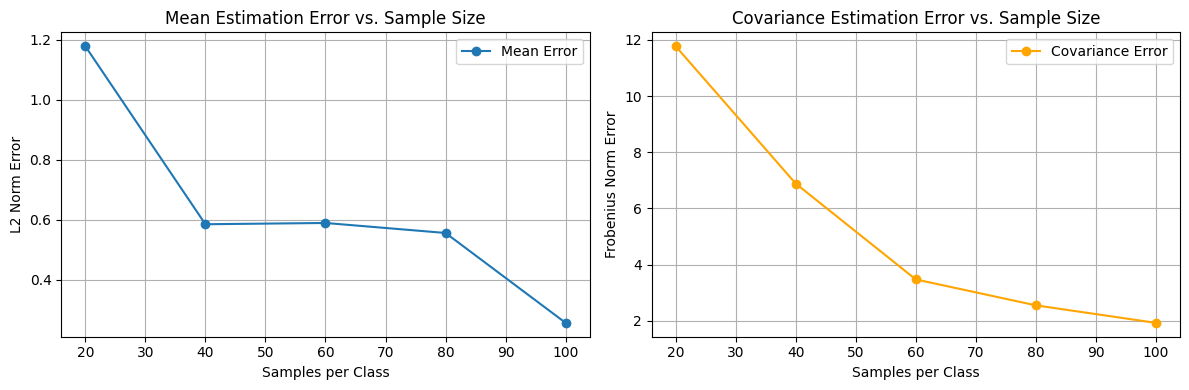

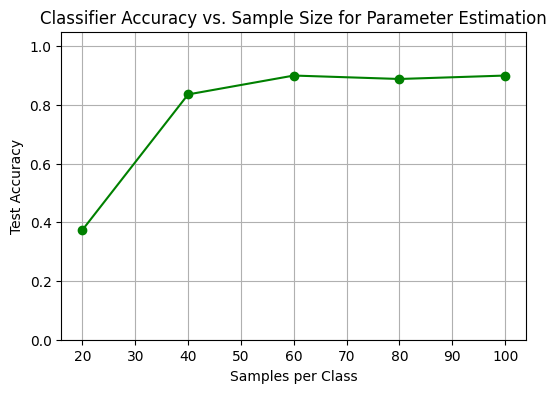

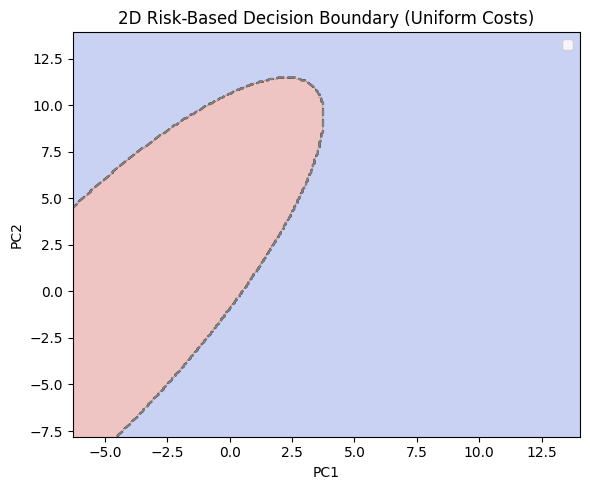

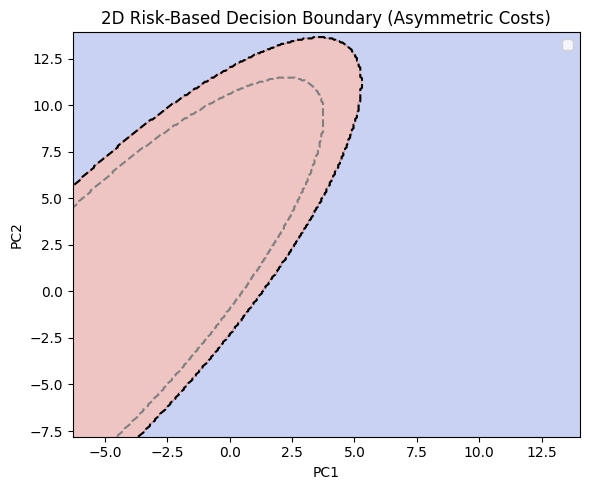

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

# ----------------------------------------------------------------
# Define Bayes Classifier (used for classification in both parts)
# ----------------------------------------------------------------
def bayes_classifier(X, means, covariances, priors):
    n_samples = X.shape[0]
    n_classes = len(means)
    posterior = np.zeros((n_samples, n_classes))
    reg = 1e-6  # regularization term

    for i in range(n_classes):
        # Regularize the covariance matrix
        cov_reg = covariances[i] + reg * np.eye(covariances[i].shape[0])
        rv = multivariate_normal(mean=means[i], cov=cov_reg, allow_singular=True)
        likelihood = rv.pdf(X)
        posterior[:, i] = likelihood * priors[i]

    predictions = np.argmax(posterior, axis=1)
    return predictions

# ----------------------------------------------------------------
# Load and preprocess the Breast Cancer dataset
# ----------------------------------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------------
# PART A: Parameter Estimation & Sample Size Analysis
# ----------------------------------------------------------------
def estimate_parameters(X, y):
    """Estimate parameters (mean and covariance) for each class from data X, y."""
    X0 = X[y == 0]
    X1 = X[y == 1]
    mean0 = np.mean(X0, axis=0)
    mean1 = np.mean(X1, axis=0)
    # Maximum likelihood covariance: divide by n (bias=True)
    cov0 = np.cov(X0, rowvar=False, bias=True)
    cov1 = np.cov(X1, rowvar=False, bias=True)
    return mean0, mean1, cov0, cov1

# Compute reference (full training set) parameter estimates
ref_mean0, ref_mean1, ref_cov0, ref_cov1 = estimate_parameters(X_train, y_train)

# Define functions to compute estimation errors:
def parameter_estimation_error(est_mean, ref_mean):
    return np.linalg.norm(est_mean - ref_mean)

def covariance_error(est_cov, ref_cov):
    return np.linalg.norm(est_cov - ref_cov, ord='fro')

# Define sample sizes (samples per class) for the experiment
sample_sizes = [20, 40, 60, 80, 100]
mean_errors = []
cov_errors = []
accuracy_list = []

np.random.seed(42)
for n in sample_sizes:
    # For each class, randomly sample n samples from the training set
    X_train0 = X_train[y_train == 0]
    X_train1 = X_train[y_train == 1]
    idx0 = np.random.choice(len(X_train0), size=n, replace=False)
    idx1 = np.random.choice(len(X_train1), size=n, replace=False)
    sub_X0 = X_train0[idx0]
    sub_X1 = X_train1[idx1]
    sub_X = np.vstack((sub_X0, sub_X1))
    sub_y = np.array([0]*n + [1]*n)

    # Estimate parameters on the subsample
    est_mean0 = np.mean(sub_X0, axis=0)
    est_mean1 = np.mean(sub_X1, axis=0)
    est_cov0 = np.cov(sub_X0, rowvar=False, bias=True)
    est_cov1 = np.cov(sub_X1, rowvar=False, bias=True)

    # Compute errors with respect to the reference estimates
    err_mean = (parameter_estimation_error(est_mean0, ref_mean0) +
                parameter_estimation_error(est_mean1, ref_mean1)) / 2.0
    err_cov = (covariance_error(est_cov0, ref_cov0) +
               covariance_error(est_cov1, ref_cov1)) / 2.0
    mean_errors.append(err_mean)
    cov_errors.append(err_cov)

    # Evaluate classifier accuracy on the test set using these estimates.
    # Here, use the proportion in the subsample as priors (should be near 0.5)
    priors_sub = [np.mean(sub_y == 0), np.mean(sub_y == 1)]
    y_pred = bayes_classifier(X_test, [est_mean0, est_mean1], [est_cov0, est_cov1], priors_sub)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"Samples per class: {n}, Mean Error: {err_mean:.3f}, Cov Error: {err_cov:.3f}, Accuracy: {acc:.3f}")

# Plot estimation errors vs. sample size
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sample_sizes, mean_errors, marker='o', label='Mean Error')
plt.xlabel('Samples per Class')
plt.ylabel('L2 Norm Error')
plt.title('Mean Estimation Error vs. Sample Size')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(sample_sizes, cov_errors, marker='o', color='orange', label='Covariance Error')
plt.xlabel('Samples per Class')
plt.ylabel('Frobenius Norm Error')
plt.title('Covariance Estimation Error vs. Sample Size')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot classifier accuracy vs. sample size
plt.figure(figsize=(6,4))
plt.plot(sample_sizes, accuracy_list, marker='o', color='green')
plt.xlabel('Samples per Class')
plt.ylabel('Test Accuracy')
plt.title('Classifier Accuracy vs. Sample Size for Parameter Estimation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

# ----------------------------------------------------------------
# PART B: Decision Risk Analysis in a 2D PCA Space
# ----------------------------------------------------------------
# For visualization, reduce training data to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
# Estimate 2D parameters on the training set
def estimate_parameters_2d(X, y):
    X0 = X[y == 0]
    X1 = X[y == 1]
    mean0 = np.mean(X0, axis=0)
    mean1 = np.mean(X1, axis=0)
    cov0 = np.cov(X0, rowvar=False, bias=True)
    cov1 = np.cov(X1, rowvar=False, bias=True)
    return mean0, mean1, cov0, cov1

mean0_2d, mean1_2d, cov0_2d, cov1_2d = estimate_parameters_2d(X_train_2d, y_train)
priors_2d = [np.mean(y_train==0), np.mean(y_train==1)]
means_2d = [mean0_2d, mean1_2d]
covariances_2d = [cov0_2d, cov1_2d]

def risk_based_decision(X, means, covariances, priors, cost_matrix):
    """
    For each x in X, compute the expected risk for each decision using the provided cost matrix.
    Returns the decision (0 or 1) for each sample.
    """
    n_samples = X.shape[0]
    n_classes = len(means)
    likelihoods = np.zeros((n_samples, n_classes))
    for i in range(n_classes):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihoods[:, i] = rv.pdf(X)
    unnorm_post = likelihoods * np.array(priors)
    posteriors = unnorm_post / np.sum(unnorm_post, axis=1, keepdims=True)

    decisions = np.zeros(n_samples, dtype=int)
    for idx in range(n_samples):
        risks = np.zeros(n_classes)
        for d in range(n_classes):
            risks[d] = np.sum(cost_matrix[d, :] * posteriors[idx, :])
        decisions[idx] = np.argmin(risks)
    return decisions

def plot_decision_boundaries_2d(means, covariances, priors, cost_matrix, title):
    # Define grid limits based on 2D training data
    x_min, x_max = np.min(X_train_2d[:,0]) - 1, np.max(X_train_2d[:,0]) + 1
    y_min, y_max = np.min(X_train_2d[:,1]) - 1, np.max(X_train_2d[:,1]) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Standard Bayes decision (without risk adjustments)
    post0 = multivariate_normal(mean=means[0], cov=covariances[0]).pdf(grid) * priors[0]
    post1 = multivariate_normal(mean=means[1], cov=covariances[1]).pdf(grid) * priors[1]
    bayes_decision = (post1 > post0).astype(int)

    # Risk-based decisions using the given cost matrix
    risk_decision = risk_based_decision(grid, means, covariances, priors, cost_matrix)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, risk_decision.reshape(xx.shape), alpha=0.3, cmap='coolwarm')
    plt.contour(xx, yy, risk_decision.reshape(xx.shape), levels=[0.5], colors='k', linestyles='--')
    # Overlay standard Bayes decision boundary
    plt.contour(xx, yy, bayes_decision.reshape(xx.shape), levels=[0.5], colors='gray', linestyles='dashed')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(['Risk-based Boundary', 'Standard Bayes Boundary'])
    plt.tight_layout()
    plt.show()

# Define two cost matrix configurations:
# Configuration 1: Uniform misclassification cost (symmetric)
cost_matrix1 = np.array([[0, 1],
                         [1, 0]])
# Configuration 2: Asymmetric costs (e.g., misclassifying class 0 as class 1 is more costly)
cost_matrix2 = np.array([[0, 5],
                         [1, 0]])

plot_decision_boundaries_2d(means_2d, covariances_2d, priors_2d, cost_matrix1,
                            "2D Risk-Based Decision Boundary (Uniform Costs)")
plot_decision_boundaries_2d(means_2d, covariances_2d, priors_2d, cost_matrix2,
                            "2D Risk-Based Decision Boundary (Asymmetric Costs)")
